In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'stats' package from scipy library
from scipy import stats

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro
import scipy.stats

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]


In [175]:
def result(probability_value,alpha):
    if probability_value<alpha:
        print(" Reject h0")
    else:
        print("fail to reject h0")

In [2]:
nums=[17.5, 18.0, 36.8 ,31.7 ,31.7,
17.3 ,24.3, 47.7, 38.5, 17.0,
23.7, 16.5, 25.1, 17.4, 18.0,
37.6, 19.7, 21.4, 28.6, 21.6,
19.3, 20.0, 16.9, 25.2, 19.8,
25.0, 17.2, 20.4, 20.1, 29.1,
19.1, 25.2, 23.2, 25.9, 24.0,
41.7, 24.0, 16.8, 26.8, 31.4,
16.9, 17.2, 24.1, 35.2, 19.1,
22.9, 18.2, 25.4, 35.4, 25.5]
l1=list(nums)
print(l1)

[17.5, 18.0, 36.8, 31.7, 31.7, 17.3, 24.3, 47.7, 38.5, 17.0, 23.7, 16.5, 25.1, 17.4, 18.0, 37.6, 19.7, 21.4, 28.6, 21.6, 19.3, 20.0, 16.9, 25.2, 19.8, 25.0, 17.2, 20.4, 20.1, 29.1, 19.1, 25.2, 23.2, 25.9, 24.0, 41.7, 24.0, 16.8, 26.8, 31.4, 16.9, 17.2, 24.1, 35.2, 19.1, 22.9, 18.2, 25.4, 35.4, 25.5]


In [6]:
# Q1. Compute the mean, median and the mode of the data
mean=np.mean(l1)
median=np.median(l1)
mode=scipy.stats.mode(l1)
print("mean :",mean,"\n","median :",median,"\n","mode :",mode)

mean : 24.421999999999997 
 median : 23.45 
 mode : ModeResult(mode=16.9, count=2)


In [7]:
# Q2. Compute the range , variance and standard deviation of BMI
print("range :",max(l1)-min(l1), "\n", "variance :", np.var(l1),"\n","standard deviation :",np.std(l1))

range : 31.200000000000003 
 variance : 53.469716000000005 
 standard deviation : 7.312298954501245


In [8]:
# Q3. Mean deviation of the data
mean=np.mean(l1)
deviation=abs(l1-mean)
mean_deviation=np.mean(deviation)
print("mean deviation :",mean_deviation)

mean deviation : 5.6424


In [9]:
# Calculate the Pearson coefficient of skewness and comment on the  skewness of the data
skew=pd.Series(l1).skew()
print("skew :",skew)
# highly positively skewed data, which tell than the more data is distributed from the mean on rightside

skew : 1.2098844084694924


In [10]:
# Count the number of data values that fall within one standard deviation of  the mean.
def diff(l1,negative_range,positive_range):
    count=0
    for i in l1:
        if i>negative_range and i<positive_range:
            count+=1
    print("the number  of values within first std deviation is :",count)
            
negative_range=np.mean(l1)-np.std(l1)
positive_range=np.mean(l1)+np.std(l1)
print(negative_range,positive_range)

diff(l1,negative_range,positive_range)




17.109701045498753 31.73429895450124
the number  of values within first std deviation is : 38


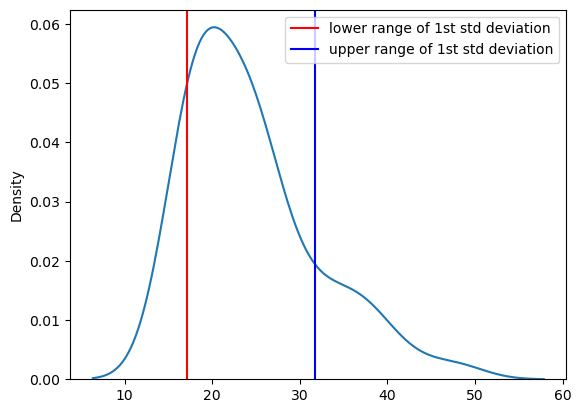

In [11]:
s1=pd.Series(l1)
sns.distplot(s1,kde=True,hist=False)
plt.axvline(negative_range,color="red",label="lower range of 1st std deviation")
plt.axvline(positive_range,color="blue",label="upper range of 1st std deviation")
plt.legend()
plt.show()

In [12]:
# Q6. Find the three quartiles and the interquartile range (IQR).
q1=s1.quantile(0.25)
q2=s1.quantile(0.50)
q3=s1.quantile(0.75)
iqr=q3-q1
print("iqr :",iqr)
print(q1,"\n",q2,"\n",q3)


iqr : 8.149999999999999
18.425 
 23.45 
 26.575


In [13]:
# Q7. Are there any outliers in the data set ?
a1 = q1 -1.5*iqr
b1 = q3+ 1.5*iqr
print(a1,b1)
l3=[]
for i in s1:
     if i<a1 or i>b1:
            l3.append(i)
print("outliers are :",l3)

6.200000000000003 38.8
outliers are : [47.7, 41.7]


In [14]:
# Q8. Draw a boxplot of the dataset to confirm .
import plotly.express as px
px.box(s1)

In [15]:
# Q9. Find the percentile rank of the datapoint 25.0.
nums=[17.5, 18.0, 36.8 ,31.7 ,31.7,
17.3 ,24.3, 47.7, 38.5, 17.0,
23.7, 16.5, 25.1, 17.4, 18.0,
37.6, 19.7, 21.4, 28.6, 21.6,
19.3, 20.0, 16.9, 25.2, 19.8,
25.0, 17.2, 20.4, 20.1, 29.1,
19.1, 25.2, 23.2, 25.9, 24.0,
41.7, 24.0, 16.8, 26.8, 31.4,
16.9, 17.2, 24.1, 35.2, 19.1,
22.9, 18.2, 25.4, 35.4, 25.5]
l1=sorted(nums,key=float)
count=0
for i in l1:
    if i<25.0:
        count+=1
print(count)
percentile=(count/len(l1))*100
print("the percentile rank of 25.0 is :", percentile)

30
the percentile rank of 25.0 is : 60.0


In [16]:
# Q10. What is the probability that a young adult has a BMI above 25.0?
# 1.test of normality
stats.shapiro(s1)
# framing hypothesis
# h0: the probability of young adult (mu<=25)
# ha: the probability of young adult (mu>25)
alpha=0.05
mu=25
xbar=np.mean(s1)
sigma=np.std(s1)
n=len(s1)
zstat=(xbar-mu)/(sigma/np.sqrt(n))
pval=stats.norm.sf(zstat)
print(zstat,pval)
result(pval,alpha)

-0.5589319064618354 0.711895903455004


NameError: name 'result' is not defined

<Axes: ylabel='Density'>

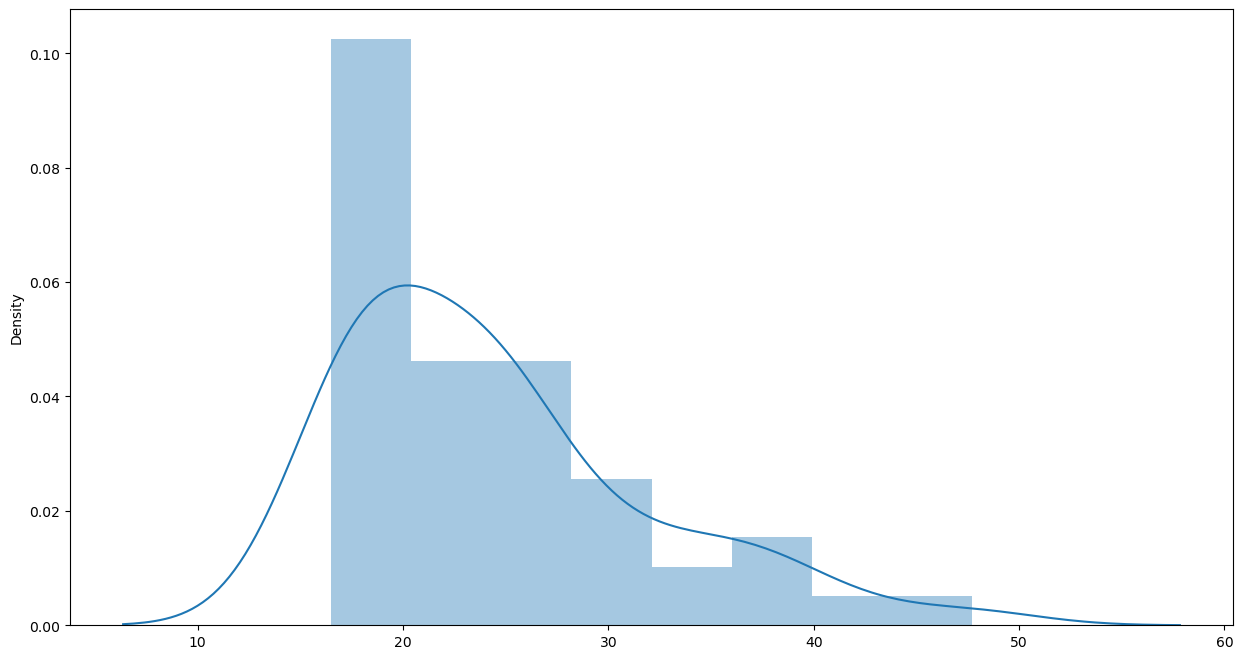

In [16]:
# Q11. Create a frequency distribution for the data and visualize it appropriately
sns.distplot(s1,hist=True,kde=True)

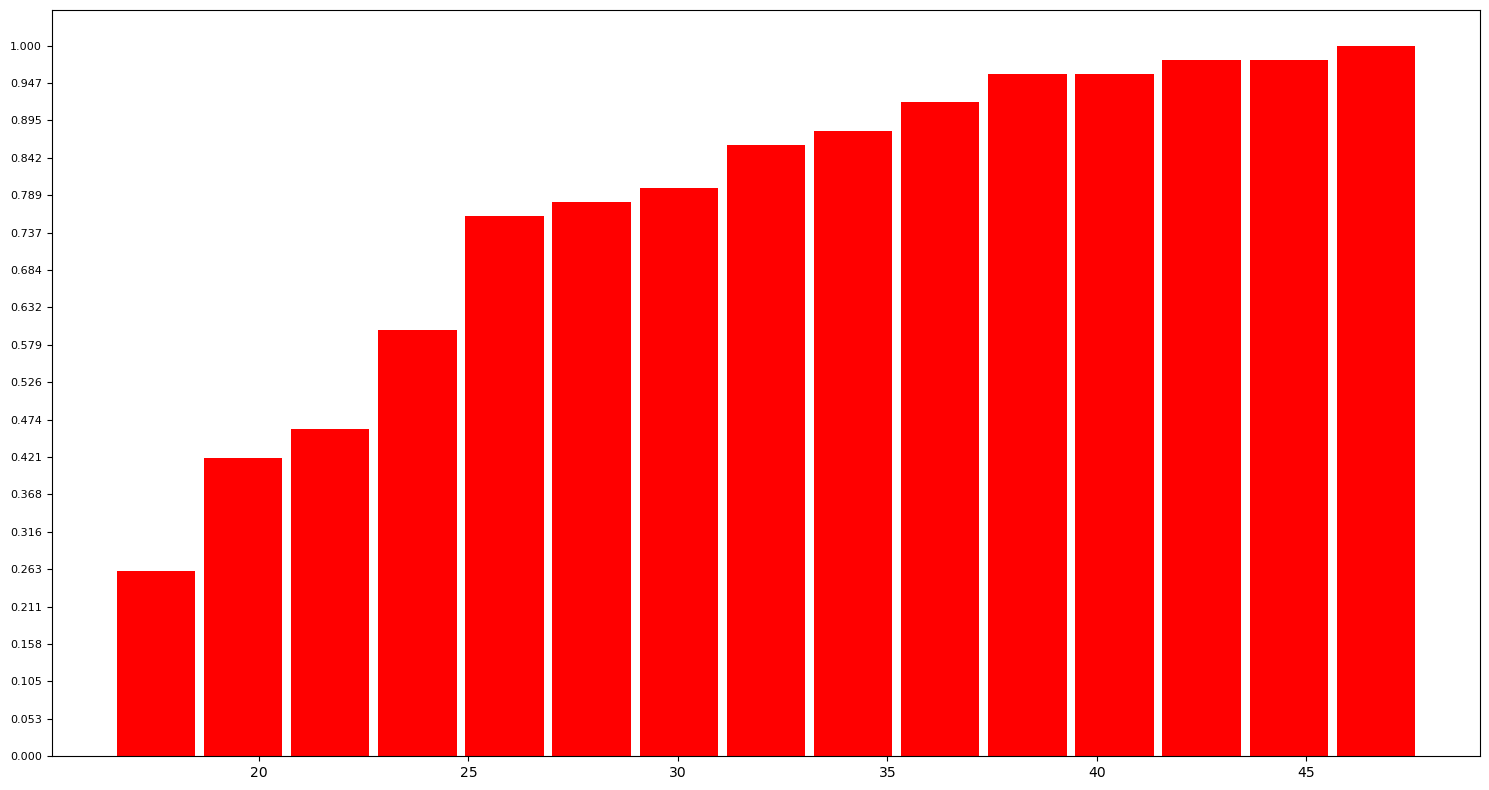

In [17]:
# Q12. Create a probability distribution of the data and visualize it appropriately. 
plt.hist(s1,bins=15,color="red",rwidth=0.9,cumulative=True,density=True)
plt.yticks(np.linspace(0,1,20),fontsize=8)
plt.tight_layout()
plt.show()



<Axes: ylabel='Density'>

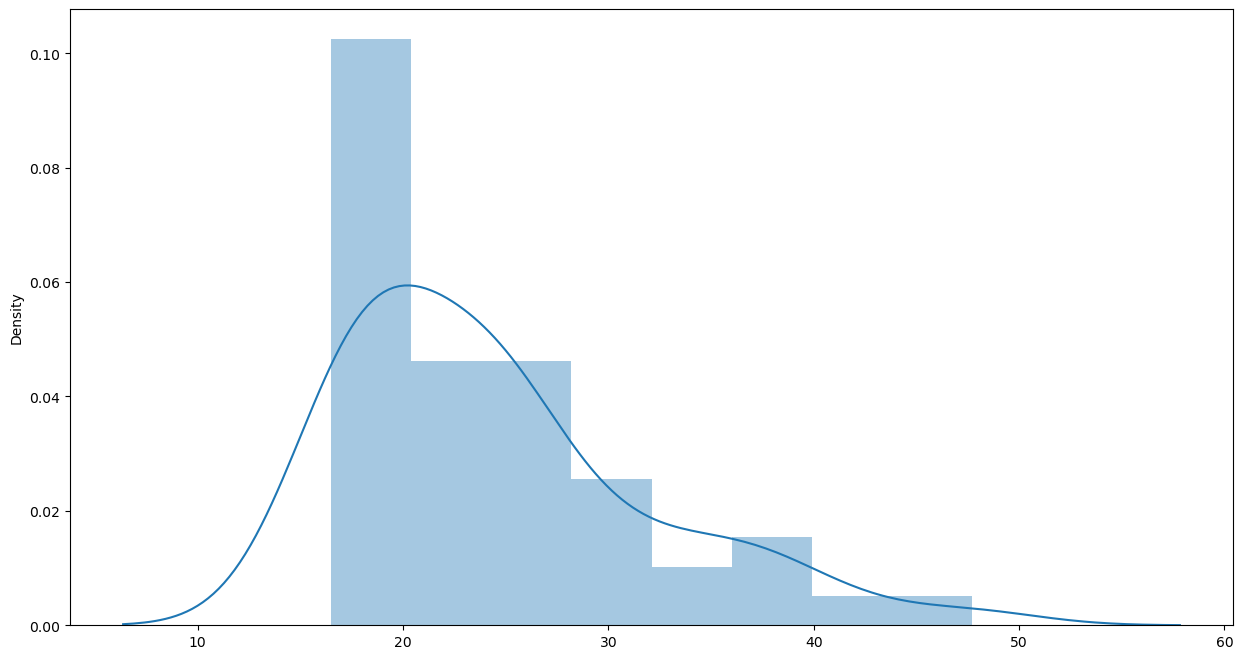

In [18]:
# Q13. What is the shape of the distribution of this dataset? Create an 
# appropriate graph to determine that. Take 100 random samples with 
# replacement from this dataset of size 5 each. Create a sampling distribution of 
# the mean age of customers. Compare with other sampling distributions of 
# sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate 
# the Central Limit Theorem?

sns.distplot(s1,hist=True,kde=True)
# the shape of the distribution is right skewed with one peak(unimodel)

24.52970297029703
0.4096400235355787


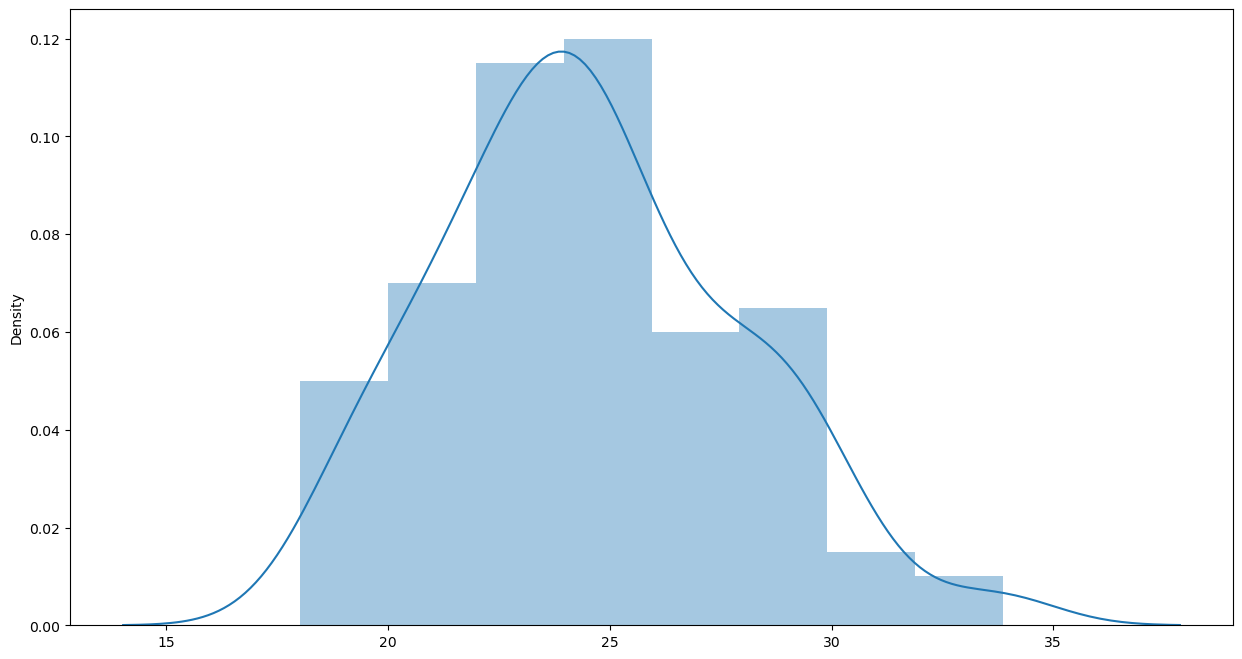

In [19]:
import random
random.seed(6)
list1=[]
for i in range(101):
    random_5=random.choices(population=s1,k=5)
    list1.append(np.mean(random_5))
sns.distplot(list1,kde=True,hist=True)
print(np.mean(list1))
s2=pd.Series(list1)
print(s2.skew())

In [20]:
print(list1)

[20.659999999999997, 24.66, 18.96, 19.139999999999997, 23.28, 19.88, 24.279999999999998, 23.580000000000002, 23.5, 29.22, 23.419999999999998, 24.0, 21.1, 27.179999999999996, 24.68, 25.339999999999996, 22.1, 28.580000000000002, 24.78, 25.02, 22.94, 26.920000000000005, 25.2, 24.199999999999996, 21.800000000000004, 23.199999999999996, 25.98, 22.639999999999997, 22.119999999999997, 33.660000000000004, 24.520000000000003, 25.5, 23.139999999999997, 24.4, 20.18, 28.740000000000002, 25.360000000000003, 20.96, 25.5, 31.24, 22.959999999999997, 25.12, 29.720000000000006, 18.96, 28.68, 21.66, 21.2, 27.259999999999998, 29.32, 25.1, 23.140000000000004, 19.6, 29.580000000000002, 23.86, 21.6, 25.939999999999998, 25.58, 30.660000000000004, 21.46, 23.52, 21.64, 24.359999999999996, 24.639999999999997, 21.160000000000004, 19.26, 22.700000000000003, 23.700000000000003, 29.8, 24.360000000000003, 27.9, 24.7, 22.96, 23.580000000000002, 28.6, 26.820000000000004, 28.160000000000004, 25.759999999999998, 30.02, 2

24.482178217821787
0.42823595543047704


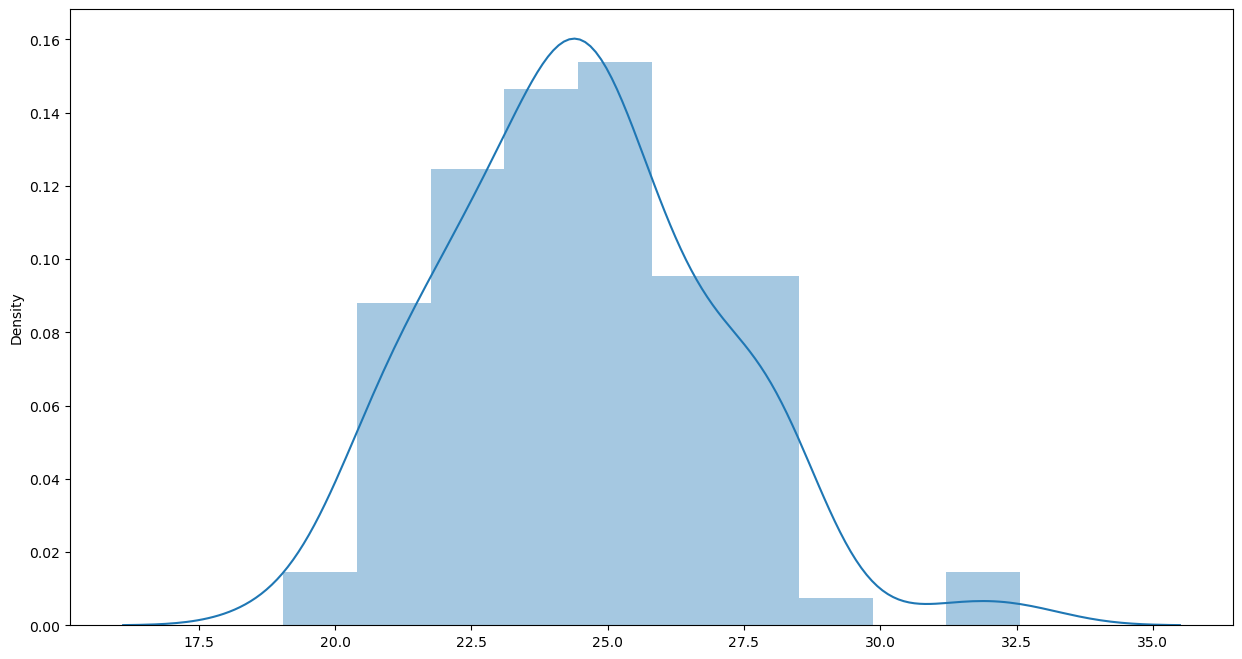

In [21]:
random.seed(6)
list2=[]
for i in range(101):
    random_10=random.choices(population=s1,k=10)
    list2.append(np.mean(random_10))
sns.distplot(list2,kde=True,hist=True)
print(np.mean(list2))
s3=pd.Series(list2)
print(s3.skew())

24.419471947194722
0.6552496391747894


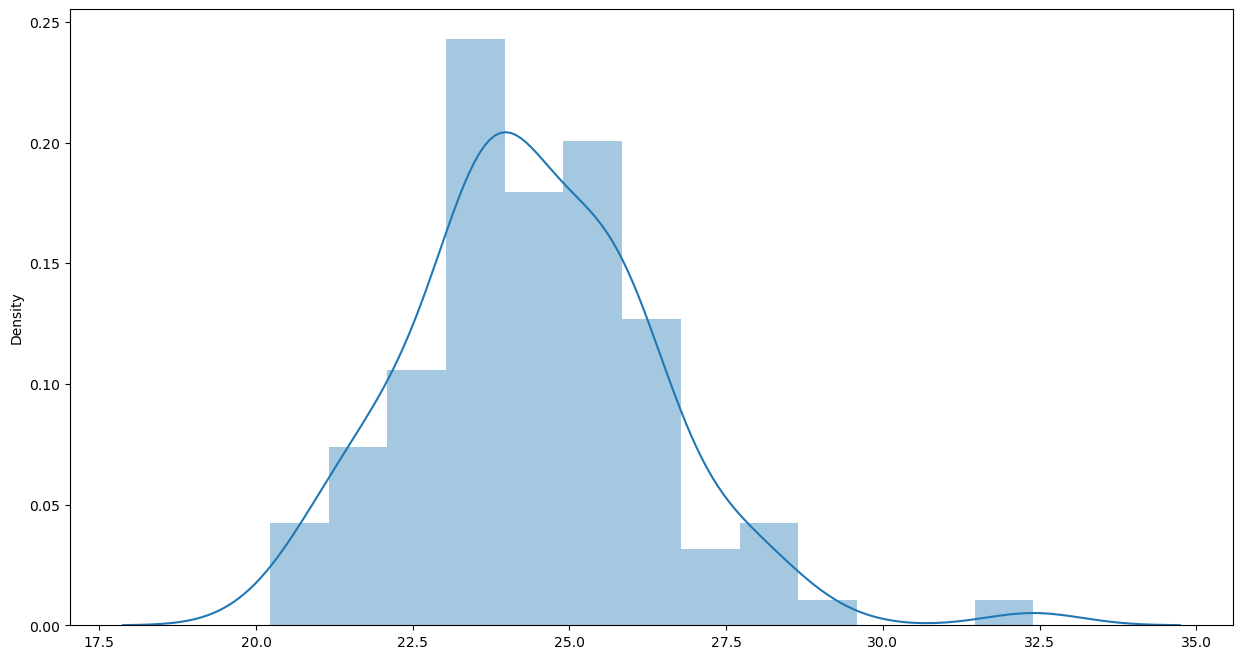

In [22]:
random.seed(6)
list3=[]
for i in range(101):
    random_15=random.choices(population=s1,k=15)
    list3.append(np.mean(random_15))
sns.distplot(list3,kde=True,hist=True)
print(np.mean(list3))
s4=pd.Series(list3)
print(s4.skew())

24.34866336633663
0.2634721793890928


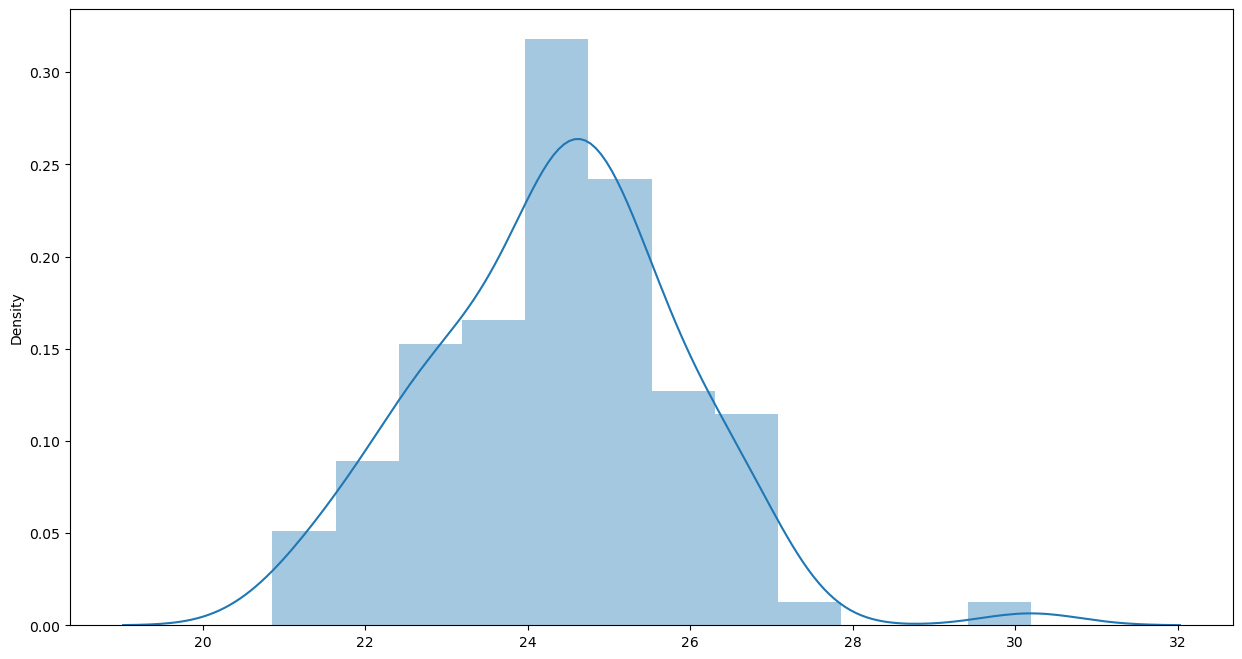

In [23]:
random.seed(6)
list4=[]
for i in range(101):
    random_20=random.choices(population=s1,k=20)
    list4.append(np.mean(random_20))
sns.distplot(list4,kde=True,hist=True)
print(np.mean(list4))
s5=pd.Series(list4)
print(s5.skew())

24.371762376237626
0.2963900394141727


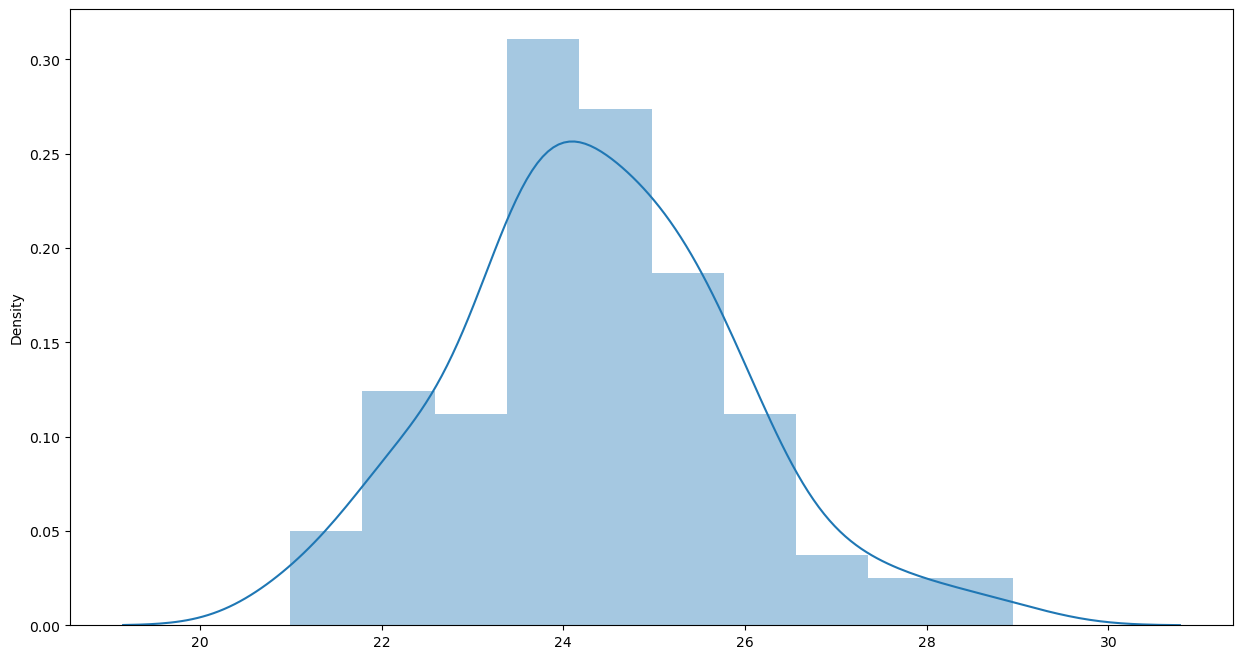

In [24]:
random.seed(6)
list5=[]
for i in range(101):
    random_25=random.choices(population=s1,k=25)
    list5.append(np.mean(random_25))
sns.distplot(list5,kde=True,hist=True)
print(np.mean(list5))
s6=pd.Series(list5)
print(s6.skew())

24.23950495049505
0.15492274663277517


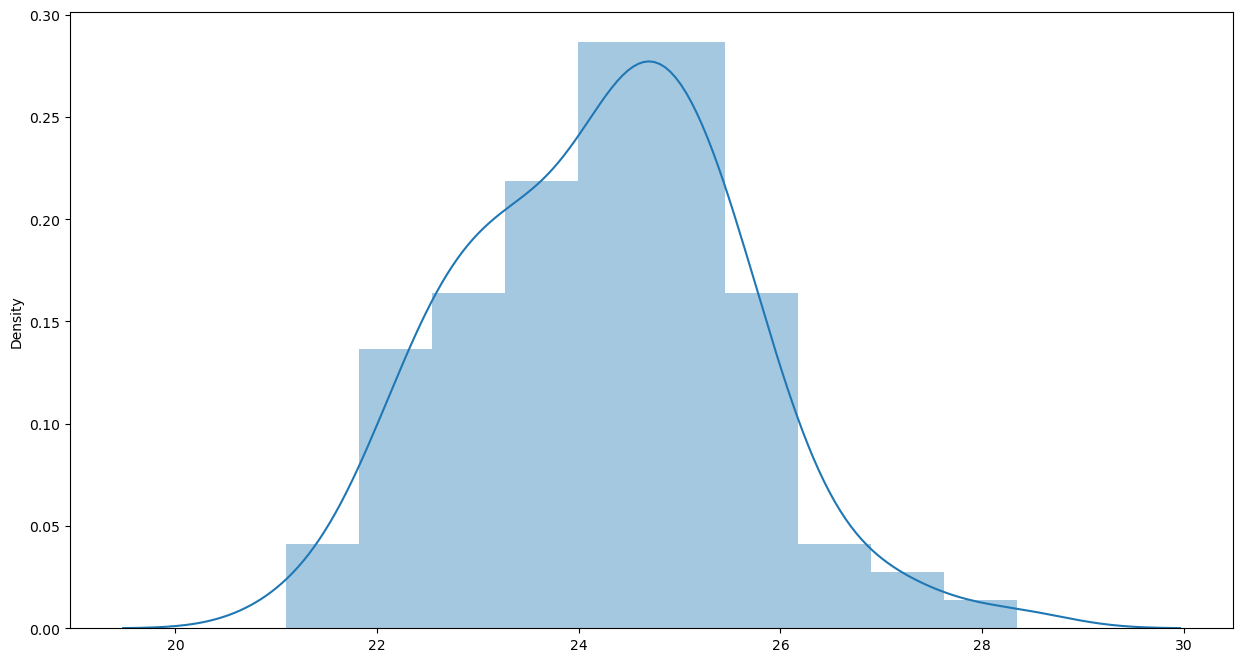

In [25]:
random.seed(6)
list6=[]
for i in range(101):
    random_30=random.choices(population=s1,k=30)
    list6.append(np.mean(random_30))
sns.distplot(list6,kde=True,hist=True)
print(np.mean(list6))
s7=pd.Series(list6)
print(s7.skew())

OBSERVATION:
From the dataset , 100 sets of data size 5 are taken( which is our sample data), the mean of all sample data are taken and a Sampling distribution is performed.

We can see that as sample increases the mean of all sample follows a normal distribution unlike the Population distrubution
( which was right skewed data in our case.)
From this we can say that ,if multiple samples are taken from population then their collective mean follows Normal distribution which corroborates Central Limit Thoerem

In [26]:
# Q14. Treat this dataset as a binomial distribution where p is the probability 
 # that a young adult has a BMI above 25.0. What is the probability that out of a 
# random sample of 10 young adults exactly 6 are having BMI greater than 25.0?

n=10
count=0
for i in l1:
    if i>25.0:
        count+=1
print(count)
p=(count/len(l1))
print(p)
r=6
pval=stats.binom.pmf(r,n,p)
print("probability that exactly 6 are having bmi>25 is :",pval,"%")


19
0.38
probability that exactly 6 are having bmi>25 is : 0.0934302761376788 %


In [27]:
# Q15. A study claims that 40% of all young adults have BMI greater than 25.0. 
# Using the Normal approximation of a Binomial distribution, find the probability 
# that in a random sample of 100 young adults exactly 50 of them will have will 
# have a BMI is greater than 25.0.
# [ Note that the normal distribution can be used to approximate a binomial 
# distribution if np>=5 and nq>=5 with the following correction for continuity
# P(X=z) = P(z-0.5 < X < z+0.5 ) ]

n=100
r=50
p=0.40

pval=stats.binom.pmf(r,n,p)
print("probability that exactly 50 are having bmi>25 is :",pval,"%")






probability that exactly 50 are having bmi>25 is : 0.010337511253847662 %


In [28]:
# Q16. Compute a 95% Confidence Interval for the true BMI of the population of 
# young adults using appropriate distribution.( State reasons as to why did you 
# use a z or t distribution

n=len(l1)
xbar=np.mean(l1)
sigma=np.std(l1)
z=stats.norm.isf(0.025)
lower_limit,upper_limit=stats.norm.interval(confidence=0.95,loc=xbar,scale=sigma/np.sqrt(n))
print(lower_limit,upper_limit)

# used z distribution as n>30.

22.395171382833713 26.44882861716628


In [29]:
# Q17. A data scientist wants to estimate with 95% confidence the proportion of 
# young adults having BMI greater than 25.0. A recent study showed that 40% 
# of all young adults have BMI greater than 25.0. The data scientist wants to be 
# accurate within 2% of the true proportion. Find the minimum sample size 
# necessary

num=19 # no of people having bmi>25.0
z=stats.norm.isf(0.025)
psamp=0.4
margin_of_error=0.02
x=psamp*(1-psamp)
n=(z**2)*x/margin_of_error**2
print("no of samples required to check bmi>25 is :",round(n))

no of samples required to check bmi>25 is : 2305


In [30]:
# Q18. The same data scientist wants to estimate the true proportion of young 
# adults having BMI greater than 25.0. She wants to be 90% confident and 
# accurate within 5% of true proportion. Find the minimum sample size 
# necessary.

z=stats.norm.isf(0.05)
psamp=0.4
margin_of_error=0.05
x=psamp*(1-psamp)
n=(z**2)*x/margin_of_error**2
print("no of samples required to check bmi>25 is :",round(n))



no of samples required to check bmi>25 is : 260


In [31]:
#Q19. A researcher claims that currently 55% of all young adults have BMI 
#greater than 25 . Test his claim with an alpha =0.05 if out of a random sample 
#of 30 CEOs only 20 are having BMI above 25

# framing hypothesis
# h0: propotion of adults have bmi<=25 (Ppop<=25)
# ha: propotion of adults have bmi>25(Ppop>25)

n=30
Psamp=20/30
Ppop=0.55
alpha=0.05
num=Psamp-Ppop
den=np.sqrt(Ppop*(1-Ppop)/n)
zprop=num/den

pval=stats.norm.sf(zprop)
print(pval)
result(pval,alpha)
# hence (h0:)  propotion of adults have bmi<=25 (5)Ppop<=2


0.09949092299862139
fail to reject h0


In [32]:
#Q 20. A data scientist is researching the hypothesis that there is no difference 
#between BMI of public vs private schools students. So he collects data from the two 
#schools and finds that the proportion of public school students whose BMI is above 
#25.0 is 31.8 % vs Private school students is 38.7 %. Suppose the data scientist got 
#these values after interviewing 500 students of each school.


#a. What hypothesis would he use to compare the proportions of students having  
# BMI greater than 25.0 among both the schools.



# b. What are critical values to be used?
#c. What statistical test will be used to compare these proportions ?

#d. Complete the test and obtain the P-value.
#e. Summarize his conclusion based on the P-value.
# -----------------------------------------------------------------------------------------------------------------------#
# SOLUTION
# framing hypothesis
# h0:  propotion of pvt school student have higher bmi>25 = than public school:(p1=p2)

# ha : propotion of pvt school student having bmi>25 !=  public school:(p1!=p2)


n1=500
n2=500
ps1=0.387*500
ps2=0.318*500
alpha=0.05

from statsmodels.stats.proportion import proportions_ztest
# formula based

num=ps1-ps2
a=((ps1*n1)+(ps2*n2))/(n1+n2)

den=np.sqrt(a*(1-a)*(1/n1 + 1/n2))
zprop=num/den
print(zprop)

pval=(stats.norm.sf(zprop))*2
print(pval)

result(pval,alpha)

# ha : propotion of pvt school student have higher bmi(>25) than public school:(p1>p2)


nan
nan
fail to reject h0


In [33]:
zprop,pval=proportions_ztest(count=[38.7,31.8],nobs=[n1,n2],value=0)
print(zprop,"\n",pval)
result(pval,alpha)
# h0:  propotion of pvt school student have higher bmi>25 = than public school:(p1=p2)


0.8523732958873553 
 0.394006936708965
fail to reject h0


# EDA 

In [17]:
df5=pd.read_csv("fifa.csv")
df5.head()

ID          Name  Age                                           Photo  \
0  240331     P. Camará   21  https://cdn.sofifa.org/players/4/19/240331.png   
1  183465    J. Rodwell   27  https://cdn.sofifa.org/players/4/19/183465.png   
2  205186  P. Gazzaniga   26  https://cdn.sofifa.org/players/4/19/205186.png   
3  233531    Y. Soteldo   21  https://cdn.sofifa.org/players/4/19/233531.png   
4  243718       R. Koot   18  https://cdn.sofifa.org/players/4/19/243718.png   

     Nationality                                  Flag  Overall  Potential  \
0  Guinea Bissau  https://cdn.sofifa.org/flags/119.png       58         69   
1        England   https://cdn.sofifa.org/flags/14.png       68         68   
2      Argentina   https://cdn.sofifa.org/flags/52.png       74         78   
3      Venezuela   https://cdn.sofifa.org/flags/61.png       71         81   
4    Netherlands   https://cdn.sofifa.org/flags/34.png       56         68   

                   Club                                        Club Logo  ...  \
0          Crawley Town  https://cdn.sofifa.org/teams/2/light/110890.png  ...   
1      Blackburn Rovers       https://cdn.sofifa.org/teams/2/light/3.png  ...   
2     Tottenham Hotspur      https://cdn.sofifa.org/teams/2/light/18.png  ...   
3  Universidad de Chile   https://cdn.sofifa.org/teams/2/light/15029.png  ...   
4       Fortuna Sittard     https://cdn.sofifa.org/teams/2/light/634.png  ...   

  Composure Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
0      46.0    14.0           18.0           15.0       7.0         9.0   
1      69.0    66.0           69.0           64.0       9.0        10.0   
2      55.0    23.0           20.0           11.0      76.0        73.0   
3      65.0    25.0           23.0           20.0      13.0         7.0   
4      39.0    11.0           14.0           12.0      59.0        55.0   

  GKKicking GKPositioning GKReflexes  Release Clause  
0       9.0           6.0       15.0           €429K  
1      15.0          11.0       12.0           €1.8M  
2      84.0          72.0       76.0           €9.6M  
3       9.0          13.0        6.0           €6.1M  
4      59.0          55.0       56.0           €198K  

[5 rows x 60 columns]

In [35]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25490 entries, 0 to 25489
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        25490 non-null  int64  
 1   Name                      25490 non-null  object 
 2   Age                       25490 non-null  int64  
 3   Photo                     25490 non-null  object 
 4   Nationality               25490 non-null  object 
 5   Flag                      25490 non-null  object 
 6   Overall                   25490 non-null  int64  
 7   Potential                 25490 non-null  int64  
 8   Club                      25159 non-null  object 
 9   Club Logo                 25490 non-null  object 
 10  Value                     25490 non-null  object 
 11  Wage                      25490 non-null  object 
 12  Preferred Foot            25425 non-null  object 
 13  International Reputation  25425 non-null  float64
 14  Weak F

In [36]:
df5["Potential"]

0        69
1        68
2        78
3        81
4        68
         ..
25485    79
25486    75
25487    77
25488    75
25489    70
Name: Potential, Length: 25490, dtype: int64

In [18]:
# 2. Drop any columns that you deem unnecessary for analysis.
 # Hint: At least keep the following columns
# ['ID','Name','Age','Nationality','Overall','Potential','Value','Wage','Joined','Preferred Foot',
# 'Contract Valid Until', 'Height', 'Weight', 'Penalties', 'Release Clause',’ International
# Reputation’, ‘Position’]


In [19]:
df5.drop(["Photo","Flag","Club Logo","Body Type","Jersey Number",],axis=1,inplace=True)

In [20]:
# 3. The following columns need to be converted for further analysis:
df5[["Joined"]]

Joined
0       Jun 8, 2017
1      Aug 23, 2018
2      Aug 23, 2017
3      Jan 11, 2018
4       Jul 1, 2016
...             ...
25485  Jul 21, 2017
25486   Aug 7, 2018
25487   Jul 1, 2008
25488  Jul 10, 2018
25489  Aug 29, 2018

[25490 rows x 1 columns]

In [21]:
df5["Value"]=df5.Value.str.replace("€","")
df5["Value"]=df5.Value.str.replace("K","")
df5["Value"]=df5.Value.str.replace("M","")

df5["Value"]=df5["Value"].astype("float")

df5["Wage"]=df5.Wage.str.replace("€","")
df5["Wage"]=df5.Wage.str.replace("K","")

df5["Wage"]=df5["Wage"].astype("float")







In [22]:
df5.Joined

0         Jun 8, 2017
1        Aug 23, 2018
2        Aug 23, 2017
3        Jan 11, 2018
4         Jul 1, 2016
             ...     
25485    Jul 21, 2017
25486     Aug 7, 2018
25487     Jul 1, 2008
25488    Jul 10, 2018
25489    Aug 29, 2018
Name: Joined, Length: 25490, dtype: object

In [42]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25490 entries, 0 to 25489
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        25490 non-null  int64  
 1   Name                      25490 non-null  object 
 2   Age                       25490 non-null  int64  
 3   Nationality               25490 non-null  object 
 4   Overall                   25490 non-null  int64  
 5   Potential                 25490 non-null  int64  
 6   Club                      25159 non-null  object 
 7   Value                     25490 non-null  float64
 8   Wage                      25490 non-null  float64
 9   Preferred Foot            25425 non-null  object 
 10  International Reputation  25425 non-null  float64
 11  Weak Foot                 25425 non-null  float64
 12  Skill Moves               25425 non-null  float64
 13  Work Rate                 25425 non-null  object 
 14  Positi

In [26]:
df5["Contract Valid Until"]

0       2019-01-01
1       2019-01-01
2       2022-01-01
3       2018-01-01
4       2020-01-01
           ...    
25485   2022-01-01
25486   2022-01-01
25487   2021-01-01
25488   2021-01-01
25489   2020-01-01
Name: Contract Valid Until, Length: 25490, dtype: datetime64[ns]

In [24]:
df5["Wage"]=df5.Wage.str.replace("K","")
df5["Wage"]=df5["Wage"].astype("float")


AttributeError: Can only use .str accessor with string values!

In [25]:
df5["Contract Valid Until"] = pd.to_datetime(df5['Contract Valid Until'], errors='coerce')
mode_value = df5['Contract Valid Until'].mode()[0]
print(mode_value)
df5['Contract Valid Until'].fillna(mode_value, inplace=True)
df5["Contract Valid Until"]

2019-01-01 00:00:00


0       2019-01-01
1       2019-01-01
2       2022-01-01
3       2018-01-01
4       2020-01-01
           ...    
25485   2022-01-01
25486   2022-01-01
25487   2021-01-01
25488   2021-01-01
25489   2020-01-01
Name: Contract Valid Until, Length: 25490, dtype: datetime64[ns]

In [27]:
df5.Joined = pd.to_datetime(df5.Joined, errors='coerce')
df5["Joined"] = df5['Joined'].dt.year
mode_value = df5['Joined'].mode()[0]
df5['Joined'].fillna(mode_value, inplace=True)

# Convert the column to integer
df5['Joined'] = df5['Joined'].astype(int)

In [28]:
df5[["Joined"]]

Joined
0        2017
1        2018
2        2017
3        2018
4        2016
...       ...
25485    2017
25486    2018
25487    2008
25488    2018
25489    2018

[25490 rows x 1 columns]

In [29]:
df5[["Height"]]

Height
0        6'1
1        6'2
2        6'5
3        5'3
4        6'1
...      ...
25485    5'9
25486    5'9
25487   5'11
25488   5'10
25489    6'2

[25490 rows x 1 columns]

In [30]:
df5["Height"]=df5["Height"].astype(str).str.replace("'",".").astype(float)
df5.Height.skew()
df5.Height.fillna(df5.Height.mean(),inplace=True)


In [31]:
df5[["Weight"]]

Weight
0      161lbs
1      172lbs
2      198lbs
3      121lbs
4      176lbs
...       ...
25485  163lbs
25486  152lbs
25487  163lbs
25488  152lbs
25489  168lbs

[25490 rows x 1 columns]

In [32]:
q=list(df_football.Weight)

NameError: name 'df_football' is not defined

In [33]:
df5["Weight"]=df5["Weight"].astype(str).str.replace("lbs","").astype(float)
df5.Weight.skew()
df5.Weight.fillna(df5.Weight.mean(),inplace=True)


In [38]:
df5[["Release Clause"]]

Release Clause
0               429.0
1                 1.8
2                 9.6
3                 6.1
4               198.0
...               ...
25461           829.0
25470           379.0
25477             1.3
25482           438.0
25489             1.3

[13053 rows x 1 columns]

In [37]:
df5['Release Clause'] = df5['Release Clause'].replace('[€KM]', '', regex=True).replace('M', '', regex=True).replace('K', '', regex=True).astype(float)
df5['Release Clause'].fillna(df5["Release Clause"].mean(), inplace=True)


In [39]:
df5.drop_duplicates(subset="Name",inplace=True)

In [40]:
df5['Name']

0           P. Camará
1          J. Rodwell
2        P. Gazzaniga
3          Y. Soteldo
4             R. Koot
             ...     
25461        M. Etuin
25470      D. Dalling
25477        K. Keleş
25482     H. Miyazawa
25489          T. Lam
Name: Name, Length: 13053, dtype: object

In [41]:
# 5. Check the variation of the features.
 # If you are performing variance and standard deviation. Kindly explain why the variances of 
 # the variables are higher than the standard deviation.
# Also, explain which one tells the exact variation of the features.
# Based on this analysis decide which feature is not needed.

df5.columns



Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [42]:
print(df5.Age.mean())           # most of the players are around age of 25-26
print(df5.Age.std())            # this tell us that the age of players lie between (25-4),(25+4)=21 to 29
print(df5.Age.var())           # variance >std tell us that most of the data are dispersed from the mean

25.075155136750173
4.639198540941165
21.522163102270632


0.3937977884580277


<Axes: xlabel='Age', ylabel='Density'>

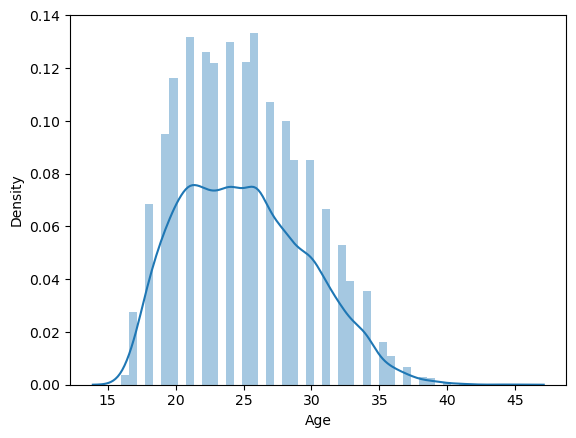

In [43]:
print(df5.Age.skew())             # right skewed data, i.e more players are>25 years
sns.distplot(df5.Age,hist=True,kde=True)

In [44]:
df5[["Height"]]

Height
0         6.1
1         6.2
2         6.5
3         5.3
4         6.1
...       ...
25461     5.9
25470     5.9
25477     5.9
25482     6.0
25489     6.2

[13053 rows x 1 columns]

5.798302484515704
0.44862228740330234
0.20126195675497122
-0.5489956526078281


<Axes: xlabel='Height', ylabel='Density'>

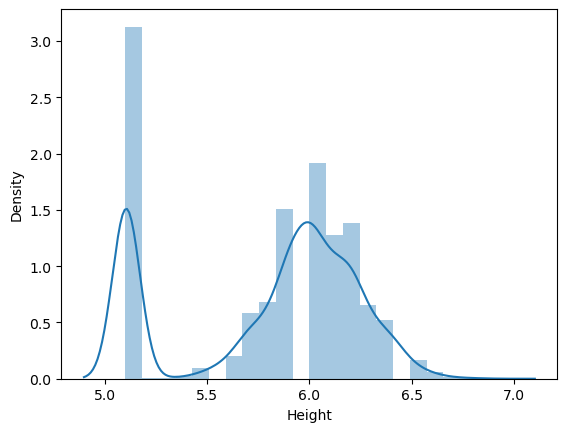

In [45]:
print(df5.Height.mean())              # average height of players is 5ft 8inc
print(df5.Height.std())               
print(df5.Height.var()) # as var<std , most of the players are within the mean height
print(df5.Height.skew())
sns.distplot(df5.Height,hist=True,kde=True)      # most of the players are >5.8inches

5.9


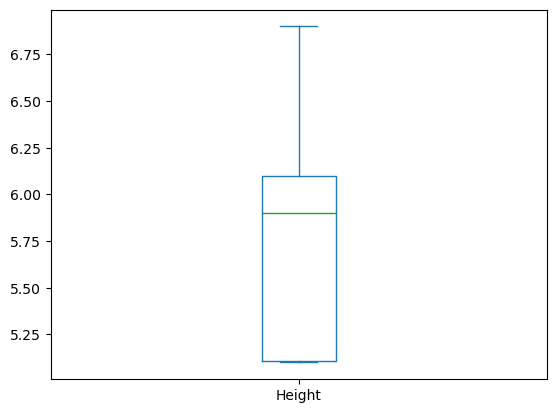

In [46]:
df5.Height.plot(kind="box")
print(df5.Height.median())

In [47]:
df5["Preferred Foot"].fillna("Right",inplace=True)
df5["Preferred Foot"].isna().sum()

0

In [48]:
df5["Preferred Foot"].value_counts(normalize=True)*100
print(df5["Preferred Foot"].mode())

0    Right
Name: Preferred Foot, dtype: object


In [49]:
df5[["Preferred Foot"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13053 entries, 0 to 25489
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Preferred Foot  13053 non-null  object
dtypes: object(1)
memory usage: 204.0+ KB


In [50]:
# frequency encoding
df5["Percent_Preferred Foot"]=df5["Preferred Foot"].map(df5["Preferred Foot"].value_counts(normalize=True)*100)


<Axes: xlabel='Percent_Preferred Foot', ylabel='Density'>

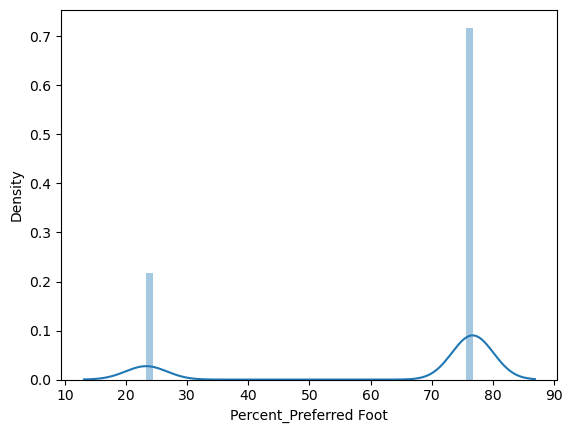

In [51]:
sns.distplot(df5["Percent_Preferred Foot"],kde=True)      # most of them are right foot players

52.15993240129052
17.340143400606628
300.6805731536016
-0.8789469819510566


<Axes: >

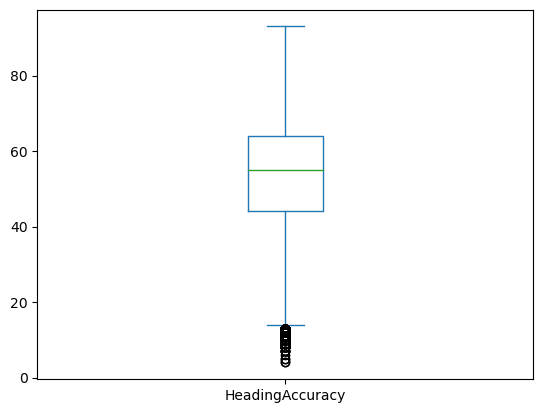

In [52]:
print(df5["HeadingAccuracy"].mean())
print(df5["HeadingAccuracy"].std())            # 34 to 69 is the std deviation of heading accuracy
print(df5["HeadingAccuracy"].var())            # var>std , hence most of them have heading accuracy <52
print(df5["HeadingAccuracy"].skew())
df5["HeadingAccuracy"].plot(kind="box")

48.58403748655707
15.706198980316461
246.68468640929385
-0.3728089428629462
50.0


<Axes: >

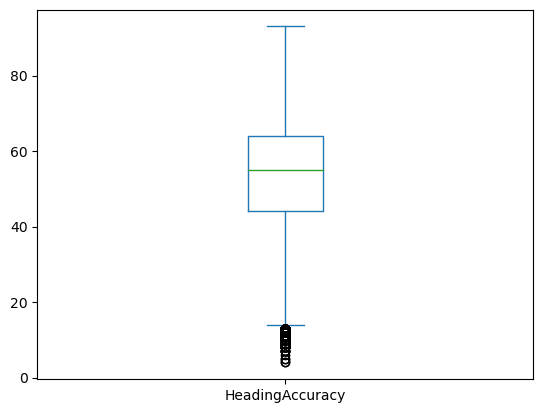

In [53]:
print(df5["Penalties"].mean())
print(df5["Penalties"].std())            # 33 to 64 is the std deviation of penalty
print(df5["Penalties"].var())            # var>std , hence most the players have penalty <48
print(df5["Penalties"].skew())
print(df5["Penalties"].median())
df5["HeadingAccuracy"].plot(kind="box")

In [54]:
df5[["Penalties"]]

Penalties
0           58.0
1           57.0
2           41.0
3           71.0
4           15.0
...          ...
25461       65.0
25470       51.0
25477       44.0
25482       49.0
25489       40.0

[13053 rows x 1 columns]

In [55]:
print(len(df5[df5["Penalties"]>df5["Penalties"].mean()]))
print(len(df5[df5["Penalties"]<df5["Penalties"].mean()]))
print(len(df5[df5["Penalties"]>df5["Penalties"].median()]))
print(len(df5[df5["Penalties"]<df5["Penalties"].median()]))
df5.Penalties.fillna(50.0,inplace=True)
df5.Penalties.isna().sum()

6873
6145
6192
6495


0

In [56]:
df5[["SlidingTackle"]]

SlidingTackle
0               15.0
1               64.0
2               11.0
3               20.0
4               12.0
...              ...
25461           58.0
25470           42.0
25477           65.0
25482           40.0
25489           68.0

[13053 rows x 1 columns]

In [57]:
# 4. Check the duplicate records and do appropriate treatments.
duplicate=df5.copy()
duplicate.drop_duplicates(keep="first",inplace=True,ignore_index=True)

duplicate.duplicated().sum()
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13053 entries, 0 to 13052
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        13053 non-null  int64         
 1   Name                      13053 non-null  object        
 2   Age                       13053 non-null  int64         
 3   Nationality               13053 non-null  object        
 4   Overall                   13053 non-null  int64         
 5   Potential                 13053 non-null  int64         
 6   Club                      12873 non-null  object        
 7   Value                     13053 non-null  float64       
 8   Wage                      13053 non-null  float64       
 9   Preferred Foot            13053 non-null  object        
 10  International Reputation  13018 non-null  float64       
 11  Weak Foot                 13018 non-null  float64       
 12  Skill Moves       

In [47]:

# 4. Check the duplicate records and do appropriate treatments.
df5.drop_duplicates(keep="first",inplace=True,ignore_index=True)

df5.duplicated().sum()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13657 entries, 0 to 13656
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        13657 non-null  int64  
 1   Name                      13657 non-null  object 
 2   Age                       13657 non-null  int64  
 3   Nationality               13657 non-null  object 
 4   Overall                   13657 non-null  int64  
 5   Potential                 13657 non-null  int64  
 6   Club                      13472 non-null  object 
 7   Value                     13657 non-null  float64
 8   Wage                      13657 non-null  float64
 9   Preferred Foot            13621 non-null  object 
 10  International Reputation  13621 non-null  float64
 11  Weak Foot                 13621 non-null  float64
 12  Skill Moves               13621 non-null  float64
 13  Work Rate                 13621 non-null  object 
 14  Positi

6. Check for missing values and do imputations where necessary.Note: Do the appropriate 
imputation based on the distribution.
Hints:
Few analyses are listed below to decide which imputation method to perform.
  1. Skewness level verification
  2. Kurtosis level measurement identification
   Explain what the Skewness and Kurtosis depicted.
  
  3. Distribution plots like KDE, Distribution plot, Box plot, etc.

In [58]:
# Anlalysing missing values for potential features(only features which will be used for analysis)
duplicate[["International Reputation"]]

International Reputation
0                           1.0
1                           2.0
2                           1.0
3                           1.0
4                           1.0
...                         ...
13048                       1.0
13049                       1.0
13050                       1.0
13051                       1.0
13052                       1.0

[13053 rows x 1 columns]

In [59]:
df_copy=duplicate.copy()

In [60]:
duplicate["International Reputation"].isnull().sum()

35

In [61]:
duplicate["International Reputation"].fillna(1,inplace=True)


In [62]:
duplicate["International Reputation"]=duplicate["International Reputation"].astype(int)

In [63]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13053 entries, 0 to 13052
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        13053 non-null  int64         
 1   Name                      13053 non-null  object        
 2   Age                       13053 non-null  int64         
 3   Nationality               13053 non-null  object        
 4   Overall                   13053 non-null  int64         
 5   Potential                 13053 non-null  int64         
 6   Club                      12873 non-null  object        
 7   Value                     13053 non-null  float64       
 8   Wage                      13053 non-null  float64       
 9   Preferred Foot            13053 non-null  object        
 10  International Reputation  13053 non-null  int32         
 11  Weak Foot                 13018 non-null  float64       
 12  Skill Moves       

In [64]:
duplicate[["Position"]].mode()

Position
0       ST

In [65]:
duplicate["Position"].isnull().sum()

45

In [66]:
duplicate["Position"].fillna("ST",inplace=True)

In [67]:
duplicate[["Positioning"]]

Positioning
0             55.0
1             67.0
2             13.0
3             65.0
4              4.0
...            ...
13048         51.0
13049         41.0
13050         65.0
13051         44.0
13052         50.0

[13053 rows x 1 columns]

In [68]:
duplicate["Positioning"].fillna(58.0,inplace=True)
duplicate["Positioning"]=duplicate["Positioning"].astype(int)

. find out If there is any player above 2.0*IQR – Q1 and below 2.0*IQR + Q3. What 
would happen if the data has above or below the mentioned values and display the 
names of the players?

In [70]:
# overall feature column
q1=duplicate["Overall"].quantile(0.25)
q3=duplicate["Overall"].quantile(0.75)
iqr=q3-q1
print("IQR :", iqr)

maxv=q3+(iqr*2)
minv=q1-(iqr*2)
print("maxv : ",maxv,"\n","minv :",minv)
outliers=duplicate[(duplicate.Overall<minv) | (duplicate.Overall>maxv)]
outliers.Name# names of player who have outliers in overal rating column

IQR : 9.0
maxv :  89.0 
 minv : 44.0


943              E. Hazard
1819     Cristiano Ronaldo
4686          K. De Bruyne
5074             Neymar Jr
5599             L. Modrić
10257         Sergio Ramos
10357             J. Oblak
11022       R. Lewandowski
11775               De Gea
11919             D. Godín
Name: Name, dtype: object

In [64]:
outliers=duplicate[(duplicate.Overall<minv) | (duplicate.Overall>maxv)]
outliers

ID               Name  Age Nationality  Overall  Potential  \
945    183277          E. Hazard   27     Belgium       91         91   
1832    20801  Cristiano Ronaldo   33    Portugal       94         94   
4491   176580          L. Suárez   31     Uruguay       91         91   
4781   192985       K. De Bruyne   27     Belgium       91         92   
5189   190871          Neymar Jr   26      Brazil       92         93   
5737   177003          L. Modrić   32     Croatia       91         91   
10639  155862       Sergio Ramos   32       Spain       91         91   
10748  200389           J. Oblak   25    Slovenia       90         93   
11456  188545     R. Lewandowski   29      Poland       90         90   
12266  193080             De Gea   27       Spain       91         93   
12421  182493           D. Godín   32     Uruguay       90         90   

                      Club  Value   Wage Preferred Foot  ...  Composure  \
945                Chelsea   93.0  340.0          Right  ...       91.0   
1832              Juventus   77.0  405.0          Right  ...       95.0   
4491          FC Barcelona   80.0  455.0          Right  ...       85.0   
4781       Manchester City  102.0  355.0          Right  ...       88.0   
5189   Paris Saint-Germain  118.5  290.0          Right  ...       94.0   
5737           Real Madrid   67.0  420.0          Right  ...       84.0   
10639          Real Madrid   51.0  380.0          Right  ...       82.0   
10748      Atlético Madrid   68.0   94.0          Right  ...       70.0   
11456    FC Bayern München   77.0  205.0          Right  ...       86.0   
12266    Manchester United   72.0  260.0          Right  ...       68.0   
12421      Atlético Madrid   44.0  125.0          Right  ...       82.0   

       Marking  StandingTackle SlidingTackle GKDiving GKHandling GKKicking  \
945       34.0            27.0          22.0     11.0       12.0       6.0   
1832      28.0            31.0          23.0      7.0       11.0      15.0   
4491      62.0            45.0          38.0     27.0       25.0      31.0   
4781      68.0            58.0          51.0     15.0       13.0       5.0   
5189      27.0            24.0          33.0      9.0        9.0      15.0   
5737      60.0            76.0          73.0     13.0        9.0       7.0   
10639     87.0            92.0          91.0     11.0        8.0       9.0   
10748     27.0            12.0          18.0     86.0       92.0      78.0   
11456     34.0            42.0          19.0     15.0        6.0      12.0   
12266     15.0            21.0          13.0     90.0       85.0      87.0   
12421     90.0            89.0          89.0      6.0        8.0      15.0   

      GKPositioning GKReflexes Release Clause  
945             8.0        8.0        €172.1M  
1832           14.0       11.0        €127.1M  
4491           33.0       37.0          €164M  
4781           10.0       13.0        €196.4M  
5189           15.0       11.0        €228.1M  
5737           14.0        9.0        €137.4M  
10639           7.0       11.0        €104.6M  
10748          88.0       89.0        €144.5M  
11456           8.0       10.0        €127.1M  
12266          88.0       94.0        €138.6M  
12421           5.0       15.0         €90.2M  

[11 rows x 55 columns]

In [72]:
# current market value
q1_1=duplicate["Value"].quantile(0.25)
q3_1=duplicate["Value"].quantile(0.75)
iqr_1=q3_1-q1_1
print("IQR :", iqr_1)
maxv_1=q3_1+(iqr_1*2)
minv_1=q1_1-(iqr_1*2)
print("maxv : ",maxv_1,"\n","minv :",minv_1)
outliers_1=duplicate[(duplicate.Value<minv_1) | (duplicate.Value>maxv_1)]
outliers_1       # names of player who have outliers in value column

IQR : 470.5
maxv :  1416.0 
 minv : -936.5


Empty DataFrame
Columns: [ID, Name, Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Joined, Loaned From, Contract Valid Until, Height, Weight, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause, Percent_Preferred Foot]
Index: []

[0 rows x 56 columns]

In [73]:
gk=duplicate[(duplicate.Position=="GK")] 
duplicate["GKDiving"].fillna(11.0,inplace=True)
duplicate["GKDiving"]=duplicate["GKDiving"].astype(int)
duplicate["GKHandling"].fillna(11.0,inplace=True)
duplicate["GKHandling"]=duplicate["GKHandling"].astype(int)
duplicate["GKKicking"].fillna(11.0,inplace=True)
duplicate["GKKicking"]=duplicate["GKKicking"].astype(int)
duplicate["GKReflexes"].fillna(11.0,inplace=True)
duplicate["GKReflexes"]=duplicate["GKReflexes"].astype(int)

In [74]:
# goal keepers GKDiving Column
q1_2=duplicate["GKDiving"].quantile(0.25)
q3_2=duplicate["GKDiving"].quantile(0.75)
iqr_2=q3_2-q1_2
print("IQR :", iqr_1)
maxv_2=q3_2+(iqr_2*2)
minv_2=q1_2-(iqr_2*2)
print("maxv : ",maxv_2,"\n","minv :",minv_2)
outliers_2=duplicate[(duplicate.GKDiving<minv_2) | (duplicate.GKDiving>maxv_2)]
outliers_2[(outliers_2.Position=="GK")]["Name"]      # names of players(goal keepers) who have outliers in GKdiving column

IQR : 470.5
maxv :  26.0 
 minv : -4.0


2        P. Gazzaniga
4             R. Koot
9            O. Kocuk
21           D. Lopar
48          Guilherme
             ...     
13025        C. Muñoz
13027      J. Pourtau
13030       P. Jensen
13032     P. Carlgren
13038       M. Langer
Name: Name, Length: 1458, dtype: object

In [75]:
# goal keepers GKHandling Column
q1_3=duplicate["GKHandling"].quantile(0.25)
q3_3=duplicate["GKHandling"].quantile(0.75)
iqr_3=q3_3-q1_3
print("IQR :", iqr_3)
maxv_3=q3_3+(iqr_3*2)
minv_3=q1_3-(iqr_3*2)
print("maxv : ",maxv_3,"\n","minv :",minv_3)
outliers_3=duplicate[(duplicate.GKHandling<minv_3) | (duplicate.GKHandling>maxv_3)]
outliers_3       # names of players(goal keepers) who have outliers in GKHandling column

IQR : 6.0
maxv :  26.0 
 minv : -4.0


ID          Name  Age  Nationality  Overall  Potential  \
2      205186  P. Gazzaniga   26    Argentina       74         78   
4      243718       R. Koot   18  Netherlands       56         68   
9      223175      O. Kocuk   22       Turkey       64         73   
21     139257      D. Lopar   33  Switzerland       64         64   
48     180714     Guilherme   32       Russia       78         78   
...       ...           ...  ...          ...      ...        ...   
13025  142998      C. Muñoz   41    Argentina       68         68   
13027  237575    J. Pourtau   18    Argentina       56         75   
13030  231237     P. Jensen   20      Denmark       56         63   
13032  216750   P. Carlgren   26       Sweden       66         70   
13038  107084     M. Langer   33      Austria       65         65   

                               Club  Value  Wage Preferred Foot  ...  Marking  \
2                 Tottenham Hotspur    5.0  46.0          Right  ...     23.0   
4                   Fortuna Sittard  120.0   1.0          Right  ...     11.0   
9                         Bursaspor  525.0   2.0          Right  ...      5.0   
21                    FC St. Gallen  230.0   3.0          Right  ...     15.0   
48                 Lokomotiv Moscow    6.0   1.0          Right  ...     14.0   
...                             ...    ...   ...            ...  ...      ...   
13025  CD Universidad de Concepción   60.0   1.0          Right  ...     18.0   
13027       Estudiantes de La Plata  150.0   1.0          Right  ...     14.0   
13030               FC Nordsjælland   90.0   1.0          Right  ...     16.0   
13032                    Randers FC  575.0   3.0          Right  ...     20.0   
13038                 FC Schalke 04  270.0   5.0          Right  ...     19.0   

       StandingTackle  SlidingTackle GKDiving GKHandling  GKKicking  \
2                20.0           11.0       76         73         84   
4                14.0           12.0       59         55         59   
9                10.0           11.0       65         67         59   
21               11.0           13.0       65         63         60   
48               16.0           18.0       82         73         72   
...               ...            ...      ...        ...        ...   
13025            14.0           19.0       67         65         68   
13027            12.0           13.0       55         58         55   
13030            14.0           12.0       57         57         57   
13032            12.0           13.0       69         60         55   
13038            12.0           13.0       64         62         60   

      GKPositioning GKReflexes  Release Clause  Percent_Preferred Foot  
2              72.0         76             9.6               76.717996  
4              55.0         56           198.0               76.717996  
9              58.0         66             1.2               76.717996  
21             63.0         60           334.0               76.717996  
48             78.0         80            12.6               76.717996  
...             ...        ...             ...                     ...  
13025          71.0         68            84.0               76.717996  
13027          52.0         61           319.0               76.717996  
13030          58.0         53           131.0               76.717996  
13032          63.0         68           762.0               76.717996  
13038          67.0         65           459.0               76.717996  

[1461 rows x 56 columns]

In [76]:
# PENALTIES
duplicate.Penalties.fillna(50.0,inplace=True)
duplicate["Penalties"]=duplicate["Penalties"].astype(int)
q1_4=duplicate["Penalties"].quantile(0.25)
q3_4=duplicate["Penalties"].quantile(0.75)
iqr_4=q3_4-q1_4
print(q1_4,q3_4)
print("IQR :", iqr_4)
maxv_4=q3_4+(iqr_4*2)
minv_4=q1_4-(iqr_4*2)
print("maxv : ",maxv_4,"\n","minv :",minv_4)
        

39.0 60.0
IQR : 21.0
maxv :  102.0 
 minv : -3.0


<Axes: >

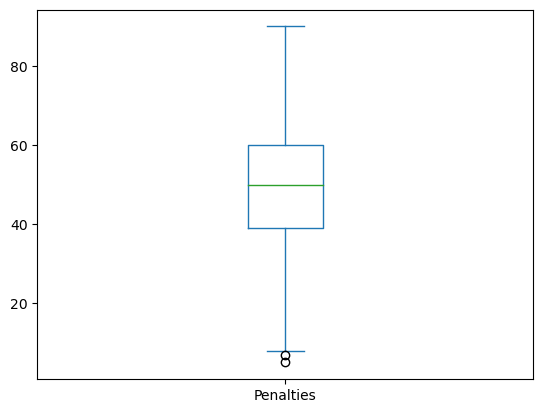

In [77]:
duplicate.Penalties.plot(kind="box")   # very few outliers. so almost all players have penalty nearer to the mean of penalty

Check the Categorical variables and Find if there is any data imbalance in any column 
also find if any cardinality problem exist

In [109]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13053 entries, 0 to 13052
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        13053 non-null  int64         
 1   Name                      13053 non-null  object        
 2   Age                       13053 non-null  int64         
 3   Nationality               13053 non-null  object        
 4   Overall                   13053 non-null  int64         
 5   Potential                 13053 non-null  int64         
 6   Club                      12873 non-null  object        
 7   Value                     13053 non-null  float64       
 8   Wage                      13053 non-null  float64       
 9   Preferred Foot            13053 non-null  object        
 10  International Reputation  13053 non-null  int32         
 11  Weak Foot                 13018 non-null  float64       
 12  Skill Moves       

In [108]:
duplicate.Club.mode()

duplicate["Club_frequency"]=duplicate.Club.map(duplicate.Club.value_counts(normalize=True)*100)
duplicate[["Club_frequency"]]  # since club has more than one mode ,imputing frequency 
duplicate["Club_frequency"].fillna(0.15536394002951914,inplace=True)   # filling with median values due to skewness


duplicate["Work Rate"]=duplicate["Work Rate"].str.replace("/"," ")
duplicate["Work Rate"].fillna("Medium  Medium",inplace=True)
duplicate["Work Rate"].isnull().sum()


duplicate["Loaned From"].fillna("Atalanta",inplace=True)
duplicate["Loaned From"].isna().sum()

0

In [111]:
duplicate["Contract Valid Until"]

0       2019-01-01
1       2019-01-01
2       2022-01-01
3       2018-01-01
4       2020-01-01
           ...    
13048   2020-01-01
13049   2019-01-01
13050   2019-01-01
13051   2021-01-01
13052   2020-01-01
Name: Contract Valid Until, Length: 13053, dtype: datetime64[ns]

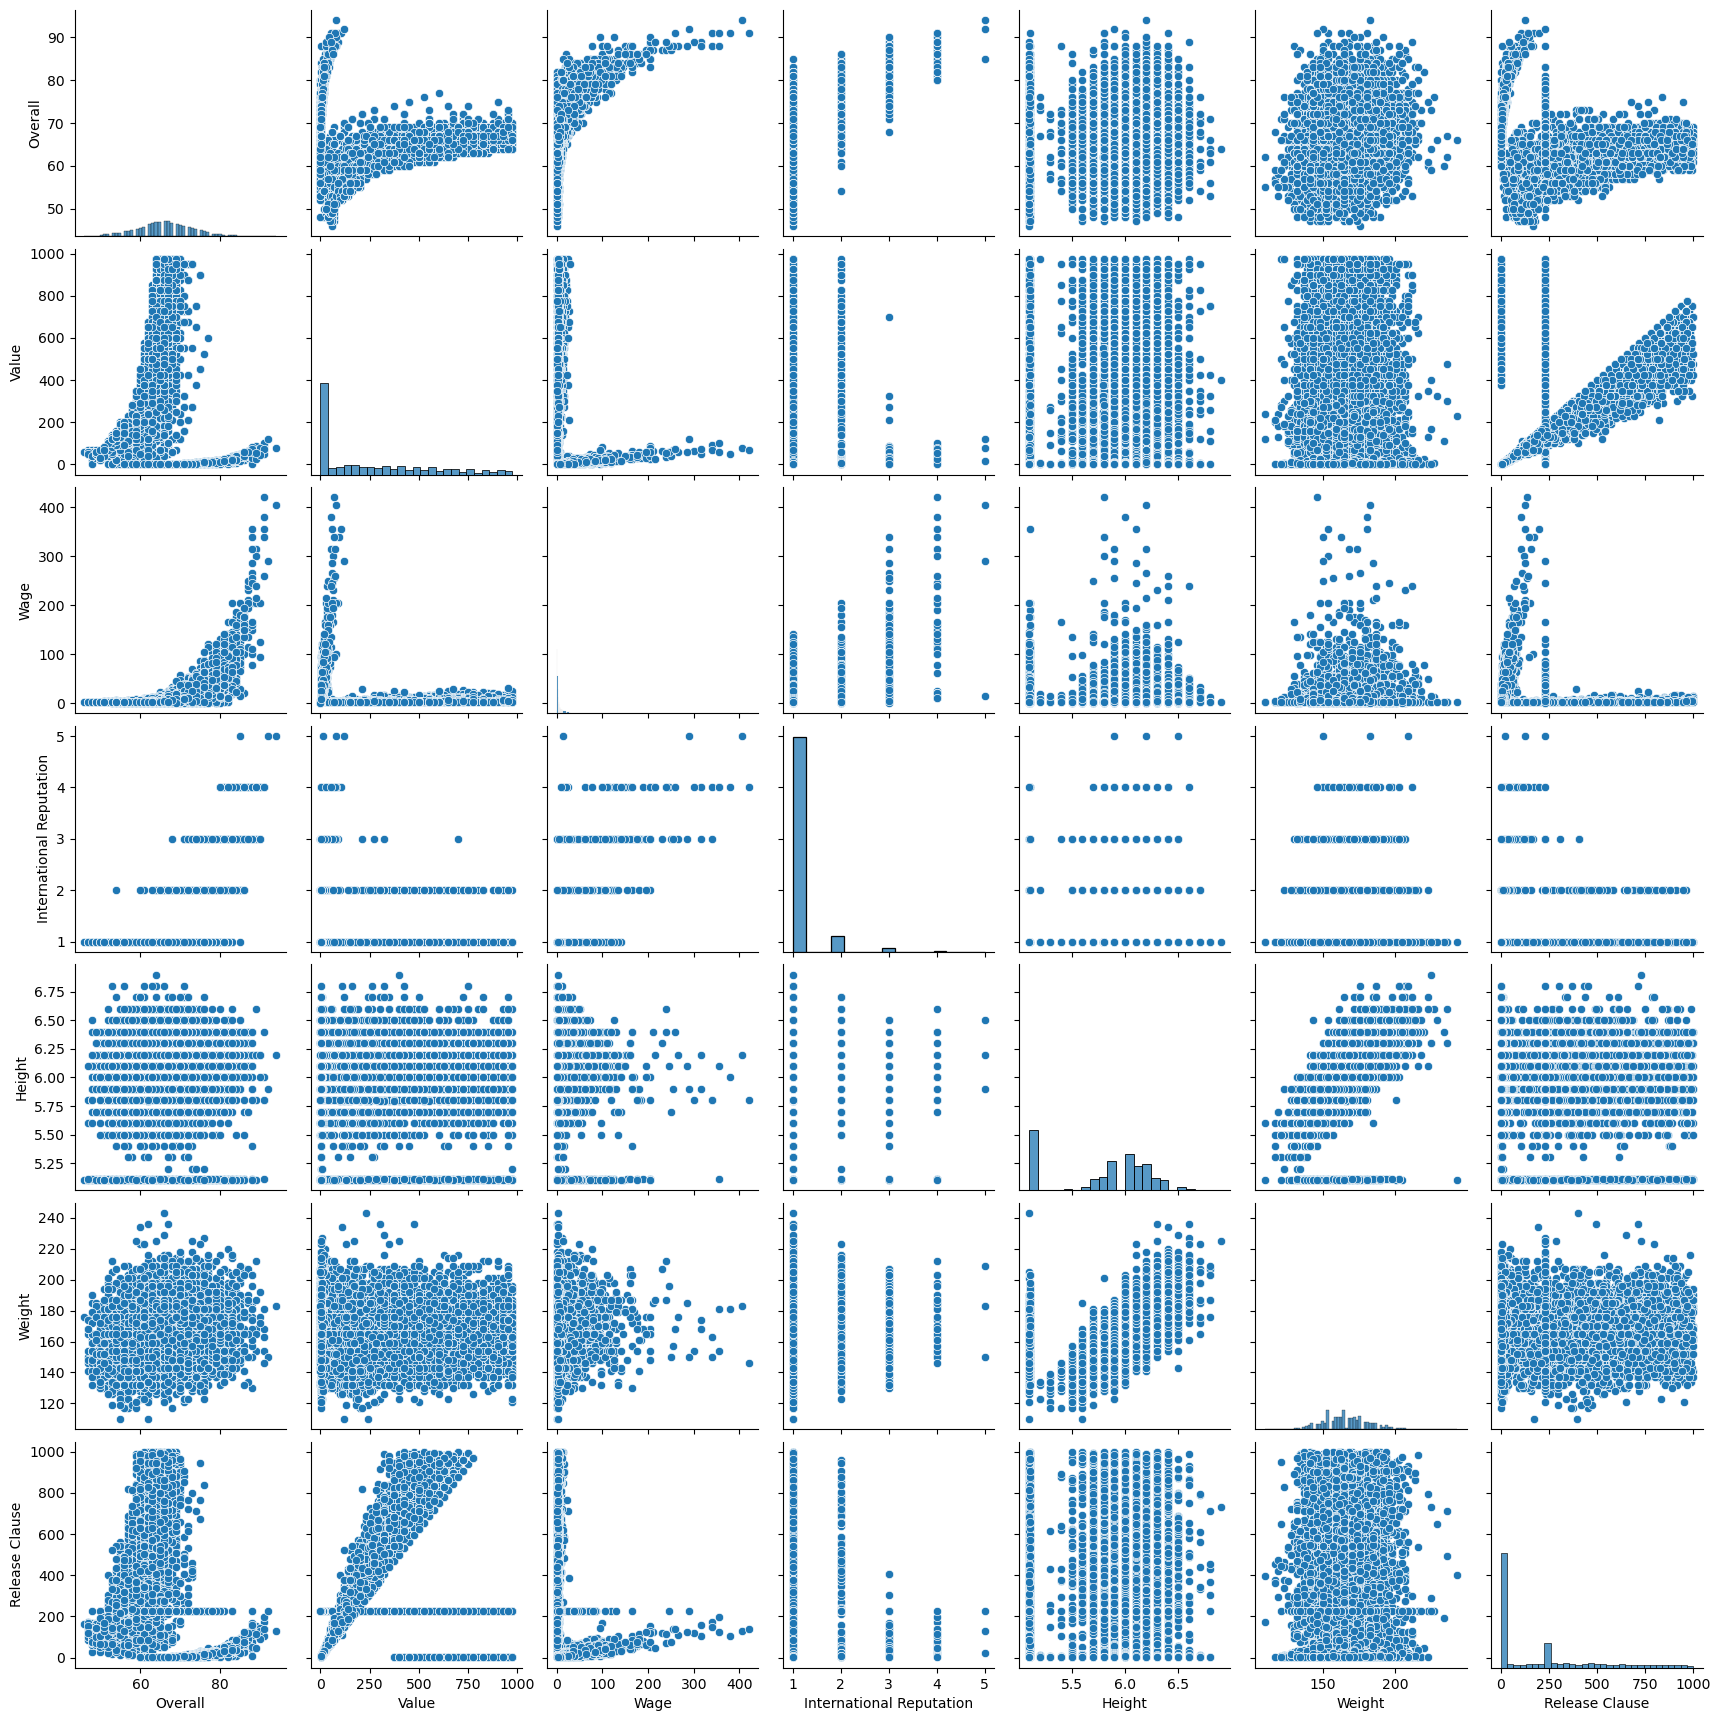

In [113]:
# 9. Generate pair plots for the following variables:
 #   Overall, Value, Wage, International Reputation, Height, Weight, Release Claus
    
    
    
df_pairplot=duplicate[["Overall","Value","Wage","International Reputation","Height","Weight","Release Clause"]]
sns.pairplot(data=df_pairplot)
plt.show()

In [131]:
# 10. Generate a table containing the top 20 players ranked by Overall score and whose 
 # contract expires in 2020
    
    
# 1. What would the average wage for this set of players be?
#2. What is the average age?
#3. Is there a correlation between the Overall rating and Value for these players? If Yes 
 #what kind of relationship that the features have, also explain why this kind of relationship 
# could happen.
    
    
    
    
    
    
duplicate["Contract Valid Until_year"]=duplicate["Contract Valid Until"].dt.year
duplicate_top20=duplicate[(duplicate["Contract Valid Until_year"]==2020)]
duplicate_top20=duplicate_top20.sort_values(by="Overall",ascending=False)
duplicate_top20[["Name"]].head(20)

Name
11775           De Gea
10257     Sergio Ramos
5599         L. Modrić
943          E. Hazard
11771     G. Chiellini
9424      Thiago Silva
4936        C. Eriksen
7082        D. Mertens
6840        Jordi Alba
9393          K. Navas
11959  T. Alderweireld
10413      Alex Sandro
2322        M. Benatia
2378            Parejo
3248          E. Džeko
1121          A. Lopes
428             Falcao
10252     M. Mandžukić
208              Jonas
1416           Willian

avg wage of these players is : 9.13283378746594
avg age ogf these players is :  25.068460490463217


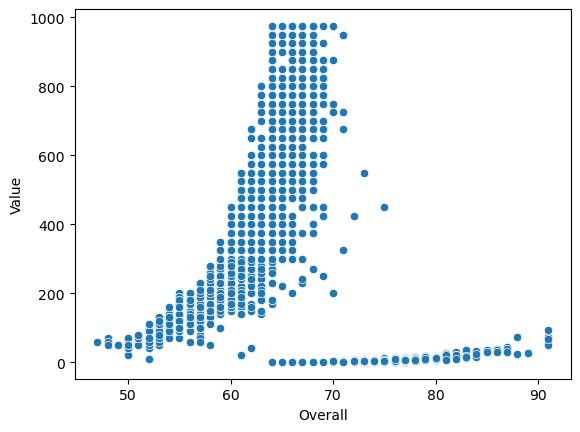

In [140]:
print("avg wage of these players is :",duplicate_top20.Wage.mean())
print("avg age ogf these players is : ",duplicate_top20.Age.mean())

sns.scatterplot(x=duplicate_top20.Overall,y=duplicate_top20.Value)
plt.show()
# the plot infers that the value of the players increases when the player has rating between 55-70, with few high rated
#  players having low value(outliers)

In [160]:
# 11. Generate tables containing the top 5 players by Overall rating for each unique position.
duplicate_top5=duplicate.sort_values("Overall",ascending=False).groupby("Position").apply(lambda x:x.head(10))
duplicate_top5[["Name"]]


Name
Position                     
CAM      4936      C. Eriksen
         7917         M. Özil
         11586  R. Nainggolan
         4086        A. Vidal
         733         D. Payet
...                       ...
ST       2653       R. Lukaku
         3248        E. Džeko
         8024    A. Lacazette
         11877     Iago Aspas
         208            Jonas

[270 rows x 1 columns]

In [167]:
# 1. Are there any players appearing at more than one table? Please point out such players-
players_appearing_more_than_once = duplicate_top5[duplicate_top5.duplicated(subset='Name', keep=False)]
players_appearing_more_than_once

# no players.

Empty DataFrame
Columns: [ID, Name, Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Joined, Loaned From, Contract Valid Until, Height, Weight, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause, Percent_Preferred Foot, Club_frequency, Contract Valid Until_year]
Index: []

[0 rows x 58 columns]

In [168]:
# 2. What is the average wage one can expect to pay for the top 5 in every position?
duplicate_top5_wage=duplicate.sort_values("Overall",ascending=False).groupby("Position")["Wage"].mean()
duplicate_top5_wage


Position
CAM     9.881857
CB      7.443209
CDM     9.160637
CF     10.924528
CM      8.213733
GK      6.806584
LAM    12.076923
LB      8.660963
LCB    11.969565
LCM    12.485714
LDM    10.337079
LF     51.076923
LM      9.684810
LS     15.020548
LW     14.188192
LWB     8.614035
RAM    12.125000
RB      8.202162
RCB    13.149123
RCM    14.065972
RDM    12.505556
RF     20.416667
RM      9.710559
RS     12.546584
RW     14.190114
RWB     7.656250
ST      9.571056
Name: Wage, dtype: float64

# STATISTICAL ANALYSIS

In [176]:
#1. Test statistically whether the Left-hand player’s overall rating is higher than the
# Right-hand overall score. Alpha = 0.05

duplicate_left=duplicate[(duplicate["Preferred Foot"]=="Left")]["Overall"]
duplicate_right=duplicate[(duplicate["Preferred Foot"]=="Right")]["Overall"]

# 2 sample, ztest,right tailed
alpha=0.05
# test of normality
print(stats.shapiro(duplicate_left))
print(stats.shapiro(duplicate_right))

# data is not normal- but still proceeding with question

# levene test
print(stats.levene(duplicate_left,duplicate_right)) # levene failed but still proceeing

# framing hypothesis
# h0:  overall rating of left foot player<right foot players(mu1<=mu2)

# ha: overall rating of left foot player> right foot players(mu1>mu2)
from statsmodels.stats import weightstats as stests

zstat,pval=stests.ztest(x1=duplicate_left,x2=duplicate_right,value=0,alternative="larger")
print(zstat,pval)
result(pval,alpha)
# therefore (ha:) overall rating of left foot player> right foot players(mu1>mu2)


ShapiroResult(statistic=0.9954792261123657, pvalue=5.342103293060063e-08)
ShapiroResult(statistic=0.9965333342552185, pvalue=1.1831252022195555e-14)
LeveneResult(statistic=26.054282739084663, pvalue=3.366211385631688e-07)
4.939882082856082 3.908491409241281e-07
 Reject h0


In [183]:
# 2. Does the age factor affect the player’s potential? Check the claim that the players who 
 #are greater than 35, their potential will be lesser than those whose age is less than 35. 
Alpha = 0.05

duplicate_age1=duplicate[(duplicate.Age)>=35]["Potential"]
#da1=duplicate_age1["Potential"]
duplicate_age2=duplicate[(duplicate.Age)<35]["Potential"]
#da2=duplicate_age2["Potential"]

duplicate_age1_cnt=len(duplicate_age1)
duplicate_age2_cnt=len(duplicate_age2)
da1_cnt=len(da1)
da2_cnt=len(da2)
print(duplicate_age1_cnt)
print(duplicate_age2_cnt)
print(da1_cnt)
print(da2_cnt)

 # no assumptions
# framing hypothesis
# h0:players age>35 have more potential than players age<35(ps1>=ps2)
# ha: players age>35 have less potential than players age<35(ps1<ps2)
    
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count=[da1_cnt,da2_cnt],nobs=[duplicate_age1_cnt,duplicate_age2_cnt],value=0,alternative="smaller")


320
12733
320
12733


(nan, nan)

In [192]:
duplicate_age1=duplicate[(duplicate.Age)>=35]
duplicate_age2=duplicate[(duplicate.Age)<35]

d1=duplicate_age1["Potential"]
d2=duplicate_age2["Potential"]
cross=pd.crosstab(duplicate_age1["Potential"],duplicate_age2["Potential"])
cross

Empty DataFrame
Columns: []
Index: []

In [193]:
duplicate["Age"].unique()

array([21, 27, 26, 18, 22, 30, 20, 29, 31, 16, 33, 19, 32, 25, 23, 24, 28,
       34, 39, 36, 35, 17, 37, 38, 40, 45, 42, 44, 41], dtype=int64)

In [200]:
print(1-(99/100))

0.010000000000000009


True
 Reject h0


<Axes: xlabel='Preferred Foot', ylabel='Position'>

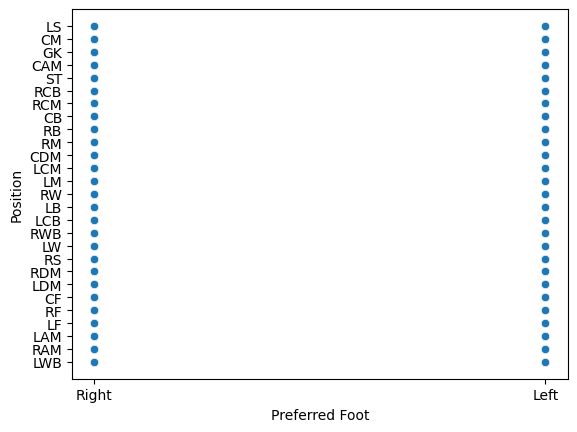

In [210]:
# . Use the statistical test to check the relationship between the Preferred Foot and Position 
# with the 99% confident interval.

# framing hypothesis:
# h0: preferred foot and Position are independent
# ha: preferred foot and Postion are dependent
alpha=0.01
crosstab=pd.crosstab(duplicate["Preferred Foot"],duplicate["Position"])
crosstab

stats.chi2_contingency(crosstab)
pval=0.0
print(pval<alpha)
result(pval,alpha)
sns.scatterplot(x=duplicate["Preferred Foot"],y=duplicate["Position"])
# ha: preferred foot and Postion are dependent 


 Reject h0


<Axes: xlabel='International Reputation', ylabel='Wage'>

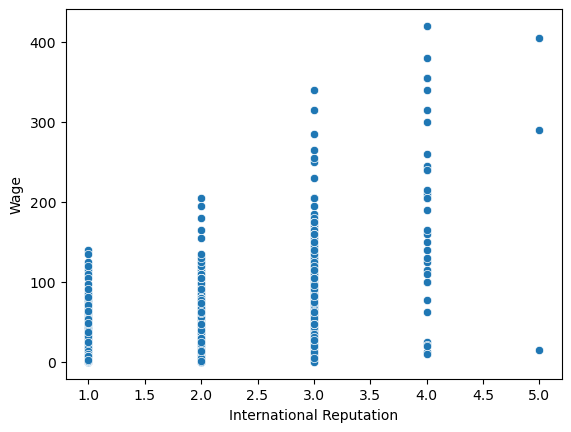

In [223]:
# 4. Does the International Reputation cause a significant effect on players' Wages?
#Check the claim with a 0.04 significance level. Check the Normality of data before the actual test.
duplicate[["Wage"]].head(40)

# framing hypothesis
# h0:  Both are independent
# ha: International reputation and wages of players are dependent

cr=pd.crosstab(duplicate["International Reputation"],duplicate["Wage"])


stats.chi2_contingency(cr)
pvalue=0.0
alpha=0.04
result(pvalue,alpha)
# ha: International reputation and wages of players are dependent

sns.scatterplot(x=duplicate["International Reputation"],y=duplicate["Wage"])

In [236]:
# 5. Check the claim that the median wages of under top 20 players are lesser than or equal 
 # to 25000. Test the claim with a 0.05 % significance level. Check the data is normally 
# distributed or not before the testing the claim statistically
 
    
# one sample ztest,data is continuous(wages)
alpha=0.05
# check for normality
print(stats.shapiro(duplicate["Wage"])) # data not normal


# framing hypothesis
# h0: median wages of top 20 players>25000
# ha: median wages of top 20 players <=25000(mu<=25000)
duplicate_top20_rating=duplicate.sort_values("Overall",ascending=False)
duplicate_top20_rating=duplicate_top20_rating.head(20)
xbar=duplicate_top20_rating.Wage.mean()
mu=25000
s=np.std(duplicate_top20_rating.Wage,ddof=1)
n=20

tstat=(xbar-mu)/(s/np.sqrt(n))
print(tstat)
pval=stats.t.cdf(tstat,df=n-1)
print(pval)
result(pval,alpha)
# ha: median wages of top 20 players <=25000(mu<=25000)



ShapiroResult(statistic=0.3970829248428345, pvalue=0.0)
-1131.5554923774396
1.2136154988289172e-47
 Reject h0
